In [21]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/content/50_Startups.csv')

In [4]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [23]:
X = data.iloc[:,:-1].values

In [24]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'New York'],
       [142107.34, 91391.77, 366168.42, 'Florida'],
       [131876.9, 99814.71, 362861.36, 'New York'],
       [134615.46, 147198.87, 127716.82, 'California'],
       [130298.13, 145530.06, 323876.68, 'Florida'],
       [120542.52, 148718.95, 311613.29, 'New York'],
       [123334.88, 108679.17, 304981.62, 'California'],
       [101913.08, 110594.11, 229160.95, 'Florida'],
       [100671.96, 91790.61, 249744.55, 'California'],
       [93863.75, 127320.38, 249839.44, 'Florida'],
       [91992.39, 135495.07, 252664.93, 'California'],
       [119943.24, 156547.42, 256512.92, 'Florida'],
       [114523.61, 122616.84, 261776.23, 'New York'],
       [78013.11, 121597.55, 264346.06, 'California'],
       [94657.16, 145077.58, 282574.31, 'New York'],
       [91749.16, 114175.79, 29491

In [6]:
y = data.iloc[:,4].values

In [7]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

In [16]:
X[:,3]= le.fit_transform(X[:,3])


In [17]:
from sklearn.preprocessing import OneHotEncoder

In [18]:
ohe = OneHotEncoder()

In [25]:
X = ohe.fit_transform(X).toarray()

In [26]:
X

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [27]:
#every independed variable is depened to each other so we are remove one colunm
X = X[:,1:]

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.20,random_state= 0)

In [30]:
from sklearn.preprocessing import StandardScaler

In [33]:
sc = StandardScaler()

In [34]:
X_train = sc.fit_transform(X_train)

In [35]:
X_test = sc.fit_transform(X_test)

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr = LinearRegression()

In [38]:
lr.fit(X_train,y_train)

LinearRegression()

In [42]:
from sklearn.metrics import mean_squared_error

In [39]:
y_pred = lr.predict(X_test)

In [43]:
mean_squared_error(y_test,y_pred)

1339326935.4885268

In [44]:
y_pred

array([110448.84372403, 106442.08921634, 111096.31412443, 101309.23108357,
       111762.04152451, 111706.35081005, 104921.17184218, 114124.97799204,
       110891.41065834, 111762.04152451])

In [45]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [46]:
from matplotlib import pyplot as plt

In [59]:
x = data.iloc[:,0]
y = data.iloc[:,4]

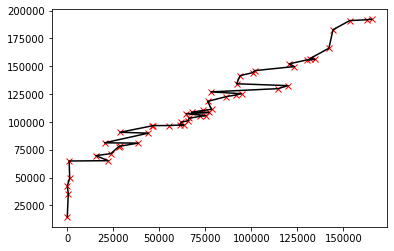

In [61]:
plt.plot(x,y,'rx')
plt.plot(x,y,c= "black")